In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

from sklearn.preprocessing import PolynomialFeatures

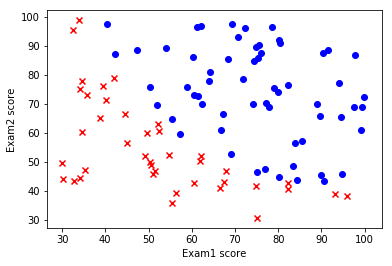

In [82]:
data = pd.read_csv('data/ex2data1.txt', names=['exam1', 'exam2', 'admit'])
exam1 = data.values[:, 0:1]
exam2 = data.values[:, 1:2]
admit = data.values[:, 2:3]


plt.xlabel('Exam1 score')
plt.ylabel('Exam2 score')
plt.scatter(data[data['admit'] == 0]['exam1'], data[data['admit'] == 0]['exam2'], marker='x', c='r')
plt.scatter(data[data['admit'] == 1]['exam1'], data[data['admit'] == 1]['exam2'], marker='o', c='b')

In [83]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


print(sigmoid(0))

0.5


In [84]:
def cost(theta, x, y):
    theta = theta.T
    m = x.shape[0]
    h = sigmoid(x.dot(theta))
    J = 1/m*((-y.T).dot(np.log(h)) - (1-y.T).dot(np.log(1-h)))
    # print(theta.shape, x.shape, y.shape, h.shape)
    return J
    
    
x = data.values[:, 0:2]
y = data.values[:, 2:3]

nx = np.c_[np.ones(x.shape[0]), x]
theta = np.zeros(nx.shape[1])
cost(theta, nx, y)


array([0.69314718])

In [85]:
def grad(theta, x, y):
    theta = theta.T.reshape(x.shape[1],1)
    m = x.shape[0]
    h = sigmoid(x.dot(theta))
    return 1/m*(x.T.dot(h-y)).ravel()
    
    
x = data.values[:, 0:2]
y = data.values[:, 2:3]

nx = np.c_[np.ones(x.shape[0]), x]
theta = np.zeros(nx.shape[1])
grad(theta, nx, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [86]:
def opt(theta, x, y):
    return op.minimize(cost, theta, args=(x, y), method=None, jac=grad, options={'maxiter':400}).x


nx = np.c_[np.ones((x.shape[0], 1)), x]
y = data.values[:, 2:3]
theta = np.zeros(nx.shape[1])
opt(theta, nx, y)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


array([-25.16133284,   0.2062317 ,   0.2014716 ])

In [87]:
px = np.array([1, 45, 85])
opttheta = opt(theta, nx, y)
sigmoid(px.dot(opttheta)) # 0.776 > 0.5 이니깐 admit 예상

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


0.776290724058894

In [88]:
prd = sigmoid(nx.dot(opttheta)) >= 0.5
prd = prd.astype('int')
print(sum(prd == y.ravel()) / prd.shape[0])

0.89


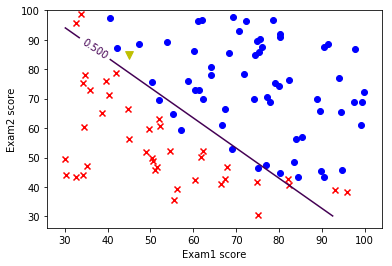

In [89]:
gx = np.linspace(30, 100, 71)
gy = np.linspace(30, 100, 71)  # grid 뽑음

xx, yy = np.meshgrid(gx, gy)  # gx,gy 각각 매핑한 점들이 생김

nxx = np.c_[np.ones(xx.ravel().shape[0]), xx.ravel(), yy.ravel()]
    
z = sigmoid(nxx.dot(opttheta))
z = z.reshape(xx.shape)
cont = plt.contour(xx, yy, z, [0.5])
plt.clabel(cont)

plt.xlabel('Exam1 score')
plt.ylabel('Exam2 score')
plt.scatter(data[data['admit'] == 0]['exam1'], data[data['admit'] == 0]['exam2'], marker='x', c='r')
plt.scatter(data[data['admit'] == 1]['exam1'], data[data['admit'] == 1]['exam2'], marker='o', c='b')

plt.scatter(45, 85, s=60, c='y', marker='v', label='(45, 85)')

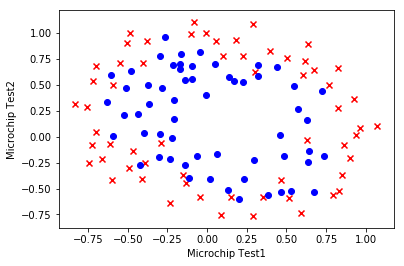

In [90]:
data2 = pd.read_csv('data/ex2data2.txt', header=None, usecols=[0, 1, 2])

plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.scatter(data2[data2[2] == 0][0], data2[data2[2] == 0][1], marker='x', c='r')
plt.scatter(data2[data2[2] == 1][0], data2[data2[2] == 1][1], marker='o', c='b')

In [91]:
def cost_reg(theta, lamda, x, y):
    theta = theta.T
    m = x.shape[0]
    h = sigmoid(x.dot(theta))
    J = 1/m*((-y.T).dot(np.log(h)) - (1-y.T).dot(np.log(1-h))) \
        + (lamda/(2*m))*np.sum(np.square(theta[1:]))
    # print(theta.shape, x.shape, y.shape, h.shape)
    return J
    

pol = PolynomialFeatures(6)
    
x = data2.values[:, 0:2]
y = data2.values[:, 2:3]
nx = pol.fit_transform(x)
theta = np.zeros(nx.shape[1])

cost_reg(theta, 1, nx, y)


array([0.69314718])

In [92]:
def grad_reg(theta, lamda, x, y):
    theta = theta.T.reshape(x.shape[1],1)
    m = x.shape[0]
    h = sigmoid(x.dot(theta))
    g = 1/m*(x.T.dot(h-y)) + (lamda/m)*theta
    return g.ravel()
    
    
x = data2.values[:, 0:2]
y = data2.values[:, 2:3]
nx = pol.fit_transform(x)
theta = np.zeros(nx.shape[1])

grad_reg(theta, 1, nx, y)

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


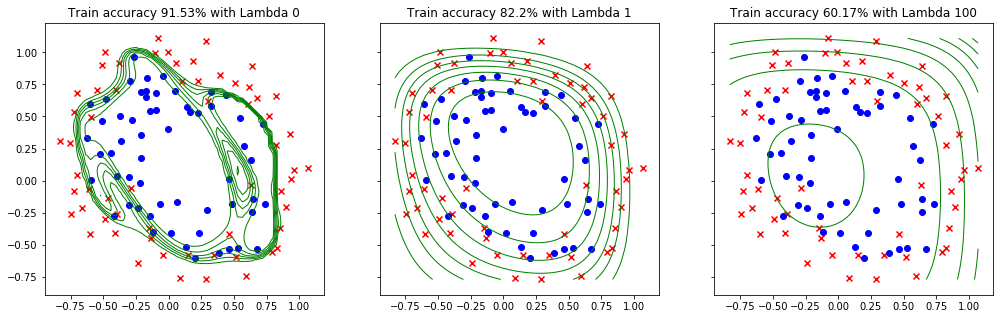

In [125]:
def opt_reg(theta, lamda, x, y):
    return op.minimize(cost_reg, theta, args=(lamda, x, y), method=None
                       , jac=grad_reg, options={'maxiter': 3000}).x


fig, axes = plt.subplots(1, 3, sharey=True, figsize=(17, 5))
for i, L in enumerate([0, 1, 100]):
    opt_reg_theta = opt_reg(theta, L, nx, y)
    
    """
    for plotting
    """
    gx = np.linspace(x[:, 0].min(), x[:, 0].max())
    gy = np.linspace(x[:, 1].min(), x[:, 1].max())  # grid 뽑음
    xx, yy = np.meshgrid(gx, gy)  # gx,gy 각각 매핑한 점들이 생김
    
    """
    get nxx with polynomial features parameters
    and apply sigmoid function
    
    """
    nxx = pol.fit_transform(np.c_[xx.ravel(), yy.ravel()])    
    z = sigmoid(nxx.dot(opt_reg_theta))
    z = z.reshape(xx.shape)
    
    """
    for accuracy check
    """
    prd = sigmoid(nx.dot(opt_reg_theta))
    prd = prd >= 0.5
    prd = prd.astype('int')
    acc = sum(prd == y.ravel()) / prd.shape[0] * 100
    acc = np.round(acc, decimals=2)
    
    # cont_reg = plt.contour(xx, yy, z, [0.5])
    # plt.xlabel('Microchip Test1')
    # plt.ylabel('Microchip Test2')
    # plt.scatter(data2[data2[2] == 0][0], data2[data2[2] == 0][1], marker='x', c='r')
    # plt.scatter(data2[data2[2] == 1][0], data2[data2[2] == 1][1], marker='o', c='b')
    # plt.clabel(cont_reg)
    
    axes.flatten()[i].contour(xx, yy, z, linewidths=1, colors='g')
    axes.flatten()[i].set_title('Train accuracy {}% with Lambda {}'.format(acc,L))
    axes.flatten()[i].scatter(data2[data2[2] == 0][0], data2[data2[2] == 0][1], marker='x', c='r')
    axes.flatten()[i].scatter(data2[data2[2] == 1][0], data2[data2[2] == 1][1], marker='o', c='b')